# Performance Assessment D206 Data Cleaning

Ali Zaheer
azaheer@wgu.edu

### Part I: Research Question

###### A.  Describe one question or decision that you will address using the data set you chose. The summarized question or decision must be relevant to a realistic organizational need or situation.

Which 'contract' type has high 'churn' and what type of correlation exists in respect to the customer's 'area'?

###### B.  Describe the variables in the data set and indicate the specific type of data being described. Use examples from the data set that support your claims.

In [1]:
import pandas as pd

In [2]:
# Load data set
df = pd.read_csv('dataSet/churn_raw_data.csv')

In [3]:
# display data set
df.head()

,Unnamed: 0,CaseOrder,Customer_id,Interaction,City,State,County,Zip,Lat,Lng,...,MonthlyCharge,Bandwidth_GB_Year,item1,item2,item3,item4,item5,item6,item7,item8
0,1,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,...,171.449762,904.536110,5,5,5,3,4,4,3,4
1,2,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,...,242.948015,800.982766,3,4,3,3,4,3,4,4
2,3,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,...,159.440398,2054.706961,4,4,2,4,4,3,3,3
3,4,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,Del Mar,CA,San Diego,92014,32.96687,-117.24798,...,120.249493,2164.579412,4,4,4,2,5,4,3,3
4,5,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,Needville,TX,Fort Bend,77461,29.38012,-95.80673,...,150.761216,271.493436,4,4,4,3,4,4,4,5


In [4]:
# Number of records in the data set
df.shape

(10000, 52)

In [5]:
# Column names and their data types
df.dtypes

Unnamed: 0                int64
CaseOrder                 int64
Customer_id              object
Interaction              object
City                     object
State                    object
County                   object
Zip                       int64
Lat                     float64
Lng                     float64
Population                int64
Area                     object
Timezone                 object
Job                      object
Children                float64
Age                     float64
Education                object
Employment               object
Income                  float64
Marital                  object
Gender                   object
Churn                    object
Outage_sec_perweek      float64
Email                     int64
Contacts                  int64
Yearly_equip_failure      int64
Techie                   object
Contract                 object
Port_modem               object
Tablet                   object
InternetService          object
Phone   

### Part II: Data-Cleaning Plan

###### C.  Explain the plan for cleaning the data by doing the following:
1.  Propose a plan that includes the relevant techniques and specific steps needed to identify anomalies in the data set.
    
    1. Use Pandas to import the CSV file in the data frame.
    2. Examine and ensure data type consistency in the columns.
    3. Validate that each column has the same data type.
    4. Identify and resolve spelling mistakes in column headers or row level data.
    5. Identify and remove outliers
        - Outliers are identified using Z-score and boxplot graphs.
        - Validate if the outliers are to be removed or kept
    6. Identify, Standardize and replaced missing values using central tendency (Mean, Mode or Median)
    
    (Larose, 2019, p.29-43)

###### 2.  Justify your approach for assessing the quality of the data, include:
###### characteristics of the data being assessed:

There are 10,000 customer related records with 52 related variables in this data set. The 'Churn' column describes and defines whether the customer has cancelled their service(s) in last month.

Other variables that are related to each customer are categorically captured below:

- Services that each customer has signed up for (phone, multiple lines, internet, online security, online backup, device protection, technical support, and streaming TV and movies)
- Customer account related information (how long they’ve been a customer, contracts, payment methods, paperless billing, monthly charges, GB usage over a year, etc.)
- Customer demographics (gender, age, job, income, etc.)

##### Approach used to assess the quality:
- Validate each column to ensure its data is consistent with its data type.
- Identify and resolve spelling mistakes in column headers.
- Identify and remove outliers.
    - Outliers are identified using Z-score and/or boxplot graphs.
- Identify and replace missing values using central tendency (Median)

###### 3.  Justify your selected programming language and any libraries and packages that will support the data-cleaning process.
    A.I will utilize Python due to my previous interaction with it and its Pandas, matplotlib and Scipy modules. Additionally, I will be using Jupyter notebook as the IDE because it provides a user-friendly experience.
    Pandas is an excellent package for working with data set as it makes it easy to load and manipulate columns and/or rows to replace null values. 
    Matplotlib plot is an easy way to create graphs for identifying outliers using histograms and/or boxplot.

##### 4.  Provide the code you will use to identify the anomalies in the data.

In [6]:
import pandas as pd
import numpy as np
from scipy import stats
%matplotlib inline
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#from icecream import ic

In [7]:
# Load data set
df = pd.read_csv('dataSet/churn_raw_data.csv', dtype={'CaseOrder':np.int64})

In [8]:
# display data set with all the columns
pd.set_option('display.max_columns', None)
df.head(n=5)

,Unnamed: 0,CaseOrder,Customer_id,Interaction,City,State,County,Zip,Lat,Lng,Population,Area,Timezone,Job,Children,Age,Education,Employment,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,item1,item2,item3,item4,item5,item6,item7,item8
0,1,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,38,Urban,America/Sitka,Environmental health practitioner,NaN,68.0,Master's Degree,Part Time,28561.99,Widowed,Male,No,6.972566,10,0,1,No,One year,Yes,Yes,Fiber Optic,Yes,No,Yes,Yes,No,No,No,Yes,Yes,Credit Card (automatic),6.795513,171.449762,904.536110,5,5,5,3,4,4,3,4
1,2,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,10446,Urban,America/Detroit,"Programmer, multimedia",1.0,27.0,Regular High School Diploma,Retired,21704.77,Married,Female,Yes,12.014541,12,0,1,Yes,Month-to-month,No,Yes,Fiber Optic,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,Bank Transfer(automatic),1.156681,242.948015,800.982766,3,4,3,3,4,3,4,4
2,3,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,3735,Urban,America/Los_Angeles,Chief Financial Officer,4.0,50.0,Regular High School Diploma,Student,NaN,Widowed,Female,No,10.245616,9,0,1,Yes,Two Year,Yes,No,DSL,Yes,Yes,No,No,No,No,No,Yes,Yes,Credit Card (automatic),15.754144,159.440398,2054.706961,4,4,2,4,4,3,3,3
3,4,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,Del Mar,CA,San Diego,92014,32.96687,-117.24798,13863,Suburban,America/Los_Angeles,Solicitor,1.0,48.0,Doctorate Degree,Retired,18925.23,Married,Male,No,15.206193,15,2,0,Yes,Two Year,No,No,DSL,Yes,No,Yes,No,No,No,Yes,No,Yes,Mailed Check,17.087227,120.249493,2164.579412,4,4,4,2,5,4,3,3
4,5,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,Needville,TX,Fort Bend,77461,29.38012,-95.80673,11352,Suburban,America/Chicago,Medical illustrator,0.0,83.0,Master's Degree,Student,40074.19,Separated,Male,Yes,8.960316,16,2,1,No,Month-to-month,Yes,No,Fiber Optic,No,No,No,No,No,Yes,Yes,No,No,Mailed Check,1.670972,150.761216,271.493436,4,4,4,3,4,4,4,5


In [9]:
# Number of records in the data set
df.shape

(10000, 52)

In [10]:
# Column names and their data types
df.dtypes

Unnamed: 0                int64
CaseOrder                 int64
Customer_id              object
Interaction              object
City                     object
State                    object
County                   object
Zip                       int64
Lat                     float64
Lng                     float64
Population                int64
Area                     object
Timezone                 object
Job                      object
Children                float64
Age                     float64
Education                object
Employment               object
Income                  float64
Marital                  object
Gender                   object
Churn                    object
Outage_sec_perweek      float64
Email                     int64
Contacts                  int64
Yearly_equip_failure      int64
Techie                   object
Contract                 object
Port_modem               object
Tablet                   object
InternetService          object
Phone   

In [11]:
# Remove column with no headers
df = df.drop(df.columns[[0]], axis=1)

In [12]:
# Amend columns with no names
df = df.rename(columns=({ 'item1': 'Timely response', 'item2':'Timely fixes', 'item3':'Timely replacements', 
                         'item4':'Reliability', 'item5':'Options', 'item6':'Respectful response',
                         'item7':'Courteous exchange', 'item8':'Evidence of active listening'}))

#### Identify spelling mistakes in the rows

In [14]:
# Review unique data in Area column
df['Area'].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [15]:
# Review unique data in Employment column
df['Employment'].unique()

array(['Part Time', 'Retired', 'Student', 'Full Time', 'Unemployed'],
      dtype=object)

In [16]:
# Review unique data in Gender column
df['Gender'].unique()

array(['Male', 'Female', 'Prefer not to answer'], dtype=object)

In [17]:
# Review unique data in Marital column
df['Marital'].unique()

array(['Widowed', 'Married', 'Separated', 'Never Married', 'Divorced'],
      dtype=object)

In [18]:
# Review unique data in PaymentMethod column
df['PaymentMethod'].unique()

array(['Credit Card (automatic)', 'Bank Transfer(automatic)',
       'Mailed Check', 'Electronic Check'], dtype=object)

In [19]:
# Review unique data in InternetService column
df['InternetService'].unique()

array(['Fiber Optic', 'DSL', 'None'], dtype=object)

In [20]:
# Review unique data in Job column
df['Job'].unique()

array(['Environmental health practitioner', 'Programmer, multimedia',
       'Chief Financial Officer', 'Solicitor', 'Medical illustrator',
       'Chief Technology Officer', 'Surveyor, hydrographic',
       'Sales promotion account executive',
       'Teaching laboratory technician', 'Museum education officer',
       'Teacher, special educational needs', 'Maintenance engineer',
       'Engineer, broadcasting (operations)', 'Learning disability nurse',
       'Automotive engineer', 'Amenity horticulturist',
       'Applications developer', 'Immunologist', 'Engineer, electrical',
       'Broadcast presenter', 'Counsellor', 'Geophysical data processor',
       'Designer, multimedia', 'Event organiser',
       'Equality and diversity officer', 'Psychiatrist',
       'Surveyor, commercial/residential', 'Civil Service administrator',
       'Radiographer, diagnostic', 'Air traffic controller', 'Dietitian',
       'Therapist, occupational', 'Building services engineer',
       'Information 

#### Reexpression of categorical data as numerical data

#### Education

In [21]:
# Capture unique values from the 'Education' column for Re-Expression
df['Education'].unique().tolist()

["Master's Degree",
 'Regular High School Diploma',
 'Doctorate Degree',
 'No Schooling Completed',
 "Associate's Degree",
 "Bachelor's Degree",
 'Some College, Less than 1 Year',
 'GED or Alternative Credential',
 'Some College, 1 or More Years, No Degree',
 '9th Grade to 12th Grade, No Diploma',
 'Nursery School to 8th Grade',
 'Professional School Degree']

In [22]:
# Re-expression categorial data in 'Education' columns
dict_edu= {'Education': {
     'No Schooling Completed': 0,
     'Nursery School to 8th Grade': 8,
     '9th Grade to 12th Grade, No Diploma':11,
     'Regular High School Diploma': 12,
     'GED or Alternative Credential': 12,
     'Some College, Less than 1 Year': 12,
     'Some College, 1 or More Years, No Degree': 12,
     'Professional School Degree':13,
     "Associate's Degree": 14,
     "Bachelor's Degree": 16,
     "Master's Degree": 18,
     'Doctorate Degree': 20,
}}

In [23]:
# Apply the Reexpression values
df.replace(dict_edu, inplace = True)

In [24]:
# display data set with Re-Expressioned 'Education' column
df.head()

,CaseOrder,Customer_id,Interaction,City,State,County,Zip,Lat,Lng,Population,Area,Timezone,Job,Children,Age,Education,Employment,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,Timely response,Timely fixes,Timely replacements,Reliability,Options,Respectful response,Courteous exchange,Evidence of active listening
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,38,Urban,America/Sitka,Environmental health practitioner,NaN,68.0,18,Part Time,28561.99,Widowed,Male,No,6.972566,10,0,1,No,One year,Yes,Yes,Fiber Optic,Yes,No,Yes,Yes,No,No,No,Yes,Yes,Credit Card (automatic),6.795513,171.449762,904.536110,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,10446,Urban,America/Detroit,"Programmer, multimedia",1.0,27.0,12,Retired,21704.77,Married,Female,Yes,12.014541,12,0,1,Yes,Month-to-month,No,Yes,Fiber Optic,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,Bank Transfer(automatic),1.156681,242.948015,800.982766,3,4,3,3,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,3735,Urban,America/Los_Angeles,Chief Financial Officer,4.0,50.0,12,Student,NaN,Widowed,Female,No,10.245616,9,0,1,Yes,Two Year,Yes,No,DSL,Yes,Yes,No,No,No,No,No,Yes,Yes,Credit Card (automatic),15.754144,159.440398,2054.706961,4,4,2,4,4,3,3,3
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,Del Mar,CA,San Diego,92014,32.96687,-117.24798,13863,Suburban,America/Los_Angeles,Solicitor,1.0,48.0,20,Retired,18925.23,Married,Male,No,15.206193,15,2,0,Yes,Two Year,No,No,DSL,Yes,No,Yes,No,No,No,Yes,No,Yes,Mailed Check,17.087227,120.249493,2164.579412,4,4,4,2,5,4,3,3
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,Needville,TX,Fort Bend,77461,29.38012,-95.80673,11352,Suburban,America/Chicago,Medical illustrator,0.0,83.0,18,Student,40074.19,Separated,Male,Yes,8.960316,16,2,1,No,Month-to-month,Yes,No,Fiber Optic,No,No,No,No,No,Yes,Yes,No,No,Mailed Check,1.670972,150.761216,271.493436,4,4,4,3,4,4,4,5


#### Identify Missing Values

In [25]:
# Identify and isolate the columns with null 
df.loc[:,df.isnull().any()]

,Children,Age,Income,Techie,Phone,TechSupport,Tenure,Bandwidth_GB_Year
0,NaN,68.0,28561.99,No,Yes,No,6.795513,904.536110
1,1.0,27.0,21704.77,Yes,Yes,No,1.156681,800.982766
2,4.0,50.0,NaN,Yes,Yes,No,15.754144,2054.706961
3,1.0,48.0,18925.23,Yes,Yes,No,17.087227,2164.579412
4,0.0,83.0,40074.19,No,No,Yes,1.670972,271.493436
...,...,...,...,...,...,...,...,...
9995,3.0,NaN,55723.74,NaN,NaN,No,68.197130,6511.253000
9996,4.0,48.0,NaN,NaN,NaN,No,61.040370,5695.952000
9997,NaN,NaN,NaN,No,Yes,No,NaN,4159.306000
9998,1.0,39.0,16667.58,No,No,Yes,71.095600,6468.457000


In [26]:
# Count of missing values per columns
df.isna().sum()

CaseOrder                          0
Customer_id                        0
Interaction                        0
City                               0
State                              0
County                             0
Zip                                0
Lat                                0
Lng                                0
Population                         0
Area                               0
Timezone                           0
Job                                0
Children                        2495
Age                             2475
Education                          0
Employment                         0
Income                          2490
Marital                            0
Gender                             0
Churn                              0
Outage_sec_perweek                 0
Email                              0
Contacts                           0
Yearly_equip_failure               0
Techie                          2477
Contract                           0
P

#### Change Misleading Field Values
##### Limitations: replacing missing value can cause the data set to be inflated as I am trying to impose what could be the accurate value
* Children: Customer might have chosen not to tell the actual number of children they have due to privacy concerns
* Phone: Customer might have chosen not to list their phone number due to privacy concerns.
* Techie: This could have been left out a human error.
* TechSupport: This could a human error, someone might not have entered appropriate values assuming 'No' and '' are the same.

In [27]:
# Replace the NAN in Childern column with 0 as it already has 0 value for people with no childern.
df['Children']=df['Children'].replace({np.NaN:0})

In [28]:
# Replace the NAN in Phone column with No, as either a person has a phone or they do not
df['Phone']=df['Phone'].replace({np.NaN:"No"})

In [29]:
# Replace the NAN in Techie column with No
df['Techie']=df['Techie'].replace({np.NaN:"No"})

In [30]:
# Replace the NAN in TechSupport column with No
df['TechSupport']=df['TechSupport'].replace({np.NaN:"No"})

#### Identify Missing Numeric Values

In [31]:
# Identify missing data in Age column
df["Age"].isnull().sum()

2475

In [32]:
#list out all values including null
df["Age"]

0       68.0
1       27.0
2       50.0
3       48.0
4       83.0
        ... 
9995     NaN
9996    48.0
9997     NaN
9998    39.0
9999    28.0
Name: Age, Length: 10000, dtype: float64

<AxesSubplot:ylabel='Frequency'>

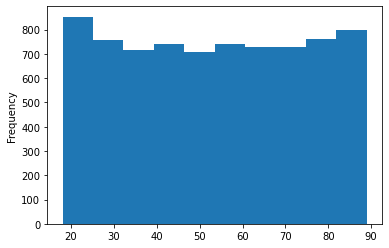

In [33]:
#Plot Age distribution
df["Age"].plot.hist()

In [34]:
# Identify missing data in Income column
df["Income"].isnull().sum()

2490

In [35]:
#list out all values including null
df["Income"]

0       28561.99
1       21704.77
2            NaN
3       18925.23
4       40074.19
          ...   
9995    55723.74
9996         NaN
9997         NaN
9998    16667.58
9999         NaN
Name: Income, Length: 10000, dtype: float64

<AxesSubplot:ylabel='Frequency'>

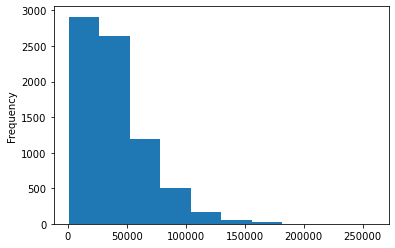

In [36]:
#Plot Income distribution
df["Income"].plot.hist()

In [37]:
# Identify missing data in Tenure column
df["Tenure"].isnull().sum()

931

In [38]:
# Identify missing data in Tenure column
df["Tenure"]

0        6.795513
1        1.156681
2       15.754144
3       17.087227
4        1.670972
          ...    
9995    68.197130
9996    61.040370
9997          NaN
9998    71.095600
9999    63.350860
Name: Tenure, Length: 10000, dtype: float64

<AxesSubplot:ylabel='Frequency'>

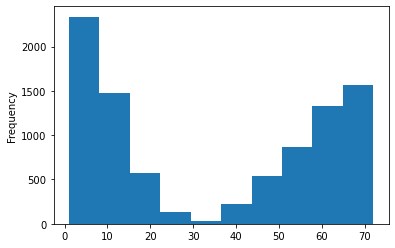

In [39]:
#Plot Tenure distribution
df["Tenure"].plot.hist()

In [40]:
# Identify missing data in Bandwidth_GB_Year column
df["Bandwidth_GB_Year"].isnull().sum()

1021

In [41]:
# Identify missing data in Bandwidth_GB_Year column
df["Bandwidth_GB_Year"]

0        904.536110
1        800.982766
2       2054.706961
3       2164.579412
4        271.493436
           ...     
9995    6511.253000
9996    5695.952000
9997    4159.306000
9998    6468.457000
9999    5857.586000
Name: Bandwidth_GB_Year, Length: 10000, dtype: float64

<AxesSubplot:ylabel='Frequency'>

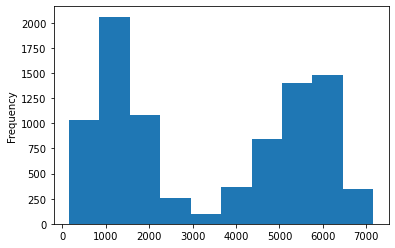

In [42]:
#Plot Bandwidth_GB_Year distribution
df["Bandwidth_GB_Year"].plot.hist()

#### Replace Missing Numeric Values with Median becuase the distrution of data is skewed as displayed above.
##### This is a robust measure that is not strongly influenced by the outliers

In [43]:
# Fill in the NAN in age with median
df["Age"].fillna(df["Age"].median(), inplace=True)

In [44]:
# Fill in the NAN in income with median
df["Income"].fillna(df["Income"].median(), inplace=True)

In [45]:
#Fill in the NAN in Tenure with median
df["Tenure"].fillna(df["Tenure"].median(), inplace=True)

In [46]:
# Fill in the NAN in Bandwidth_GB_Year with median
df["Bandwidth_GB_Year"].fillna(df["Bandwidth_GB_Year"].median(), inplace=True)

In [47]:
# Validate all the null values have been replaced 
df.isnull().any()

CaseOrder                       False
Customer_id                     False
Interaction                     False
City                            False
State                           False
County                          False
Zip                             False
Lat                             False
Lng                             False
Population                      False
Area                            False
Timezone                        False
Job                             False
Children                        False
Age                             False
Education                       False
Employment                      False
Income                          False
Marital                         False
Gender                          False
Churn                           False
Outage_sec_perweek              False
Email                           False
Contacts                        False
Yearly_equip_failure            False
Techie                          False
Contract    

### Cleaned data set

In [48]:
# Cleaned data set
df.to_csv('Cleaned_Data_set.csv')

#### Outliers

In [49]:
# Change sns settings 
sns.set(rc={'figure.figsize':(30,11)}, font_scale=1.5, style='whitegrid')

<AxesSubplot:>

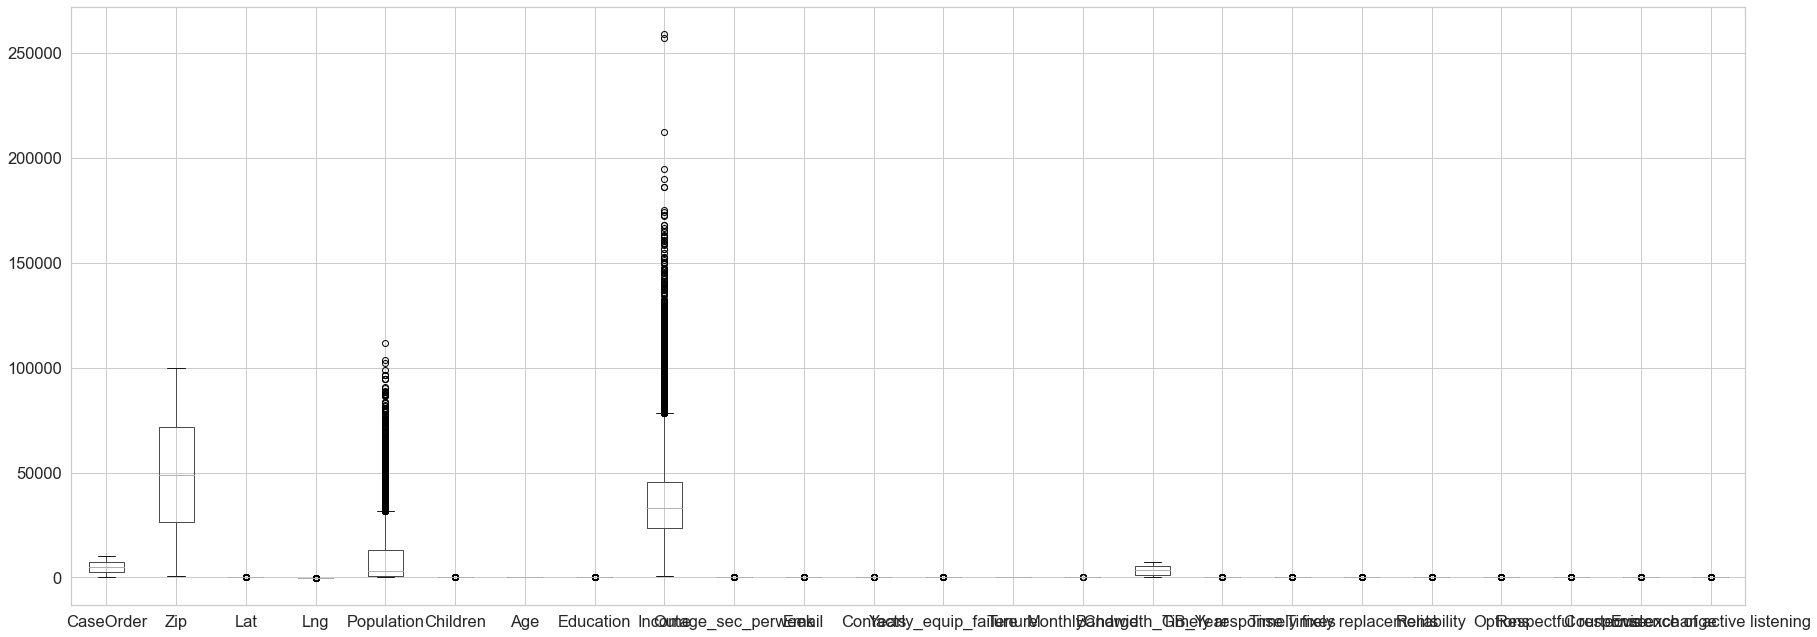

In [50]:
# Quick look to see which columns have outliers
df.boxplot()

<AxesSubplot:>

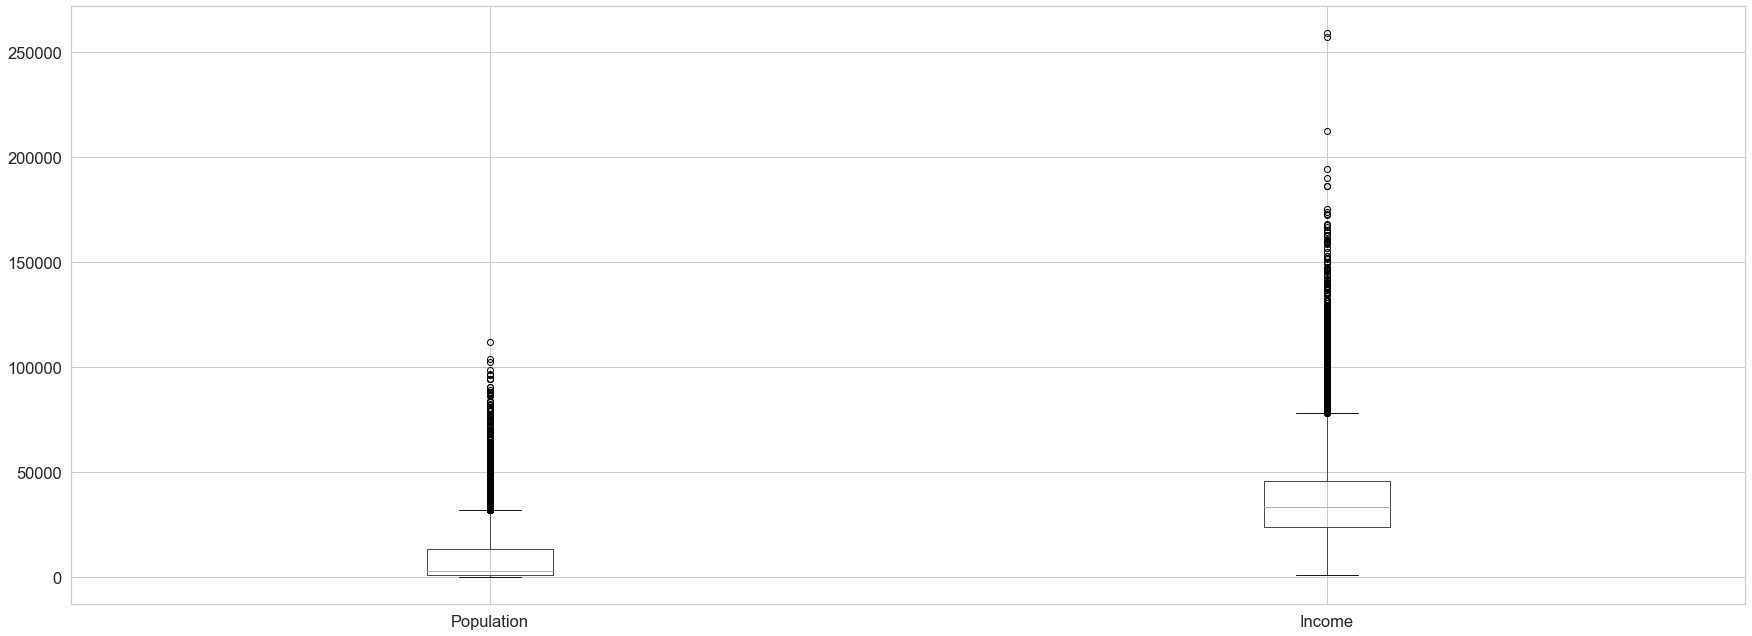

In [51]:
# Box plot of all the columns with outliers
df.boxplot(['Population', 'Income'])

##### Investigate Outliers in the Income column

<AxesSubplot:>

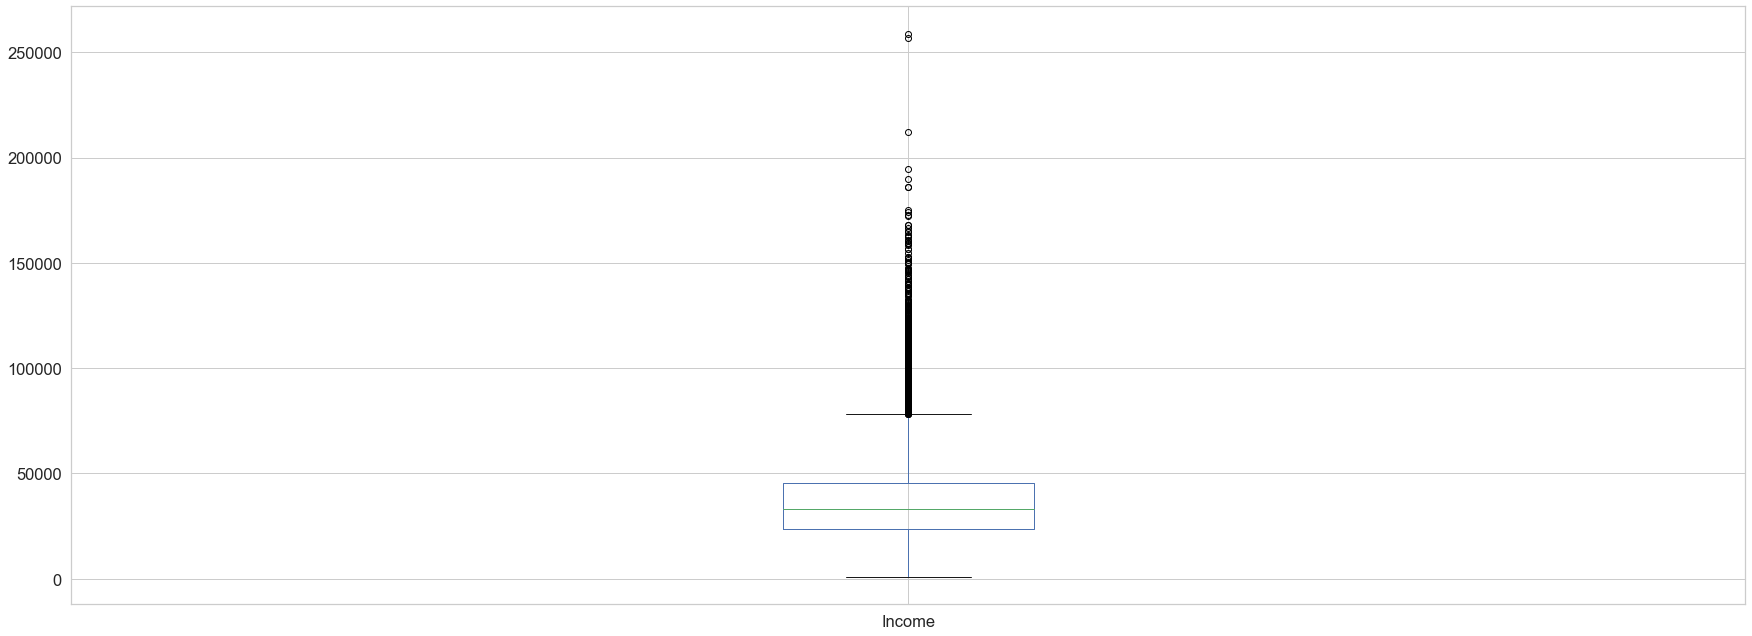

In [52]:
# Using box plot plot to identify outliers
Income = df['Income']
Income.plot.box()

<AxesSubplot:title={'center':'Income Histogram'}, ylabel='Frequency'>

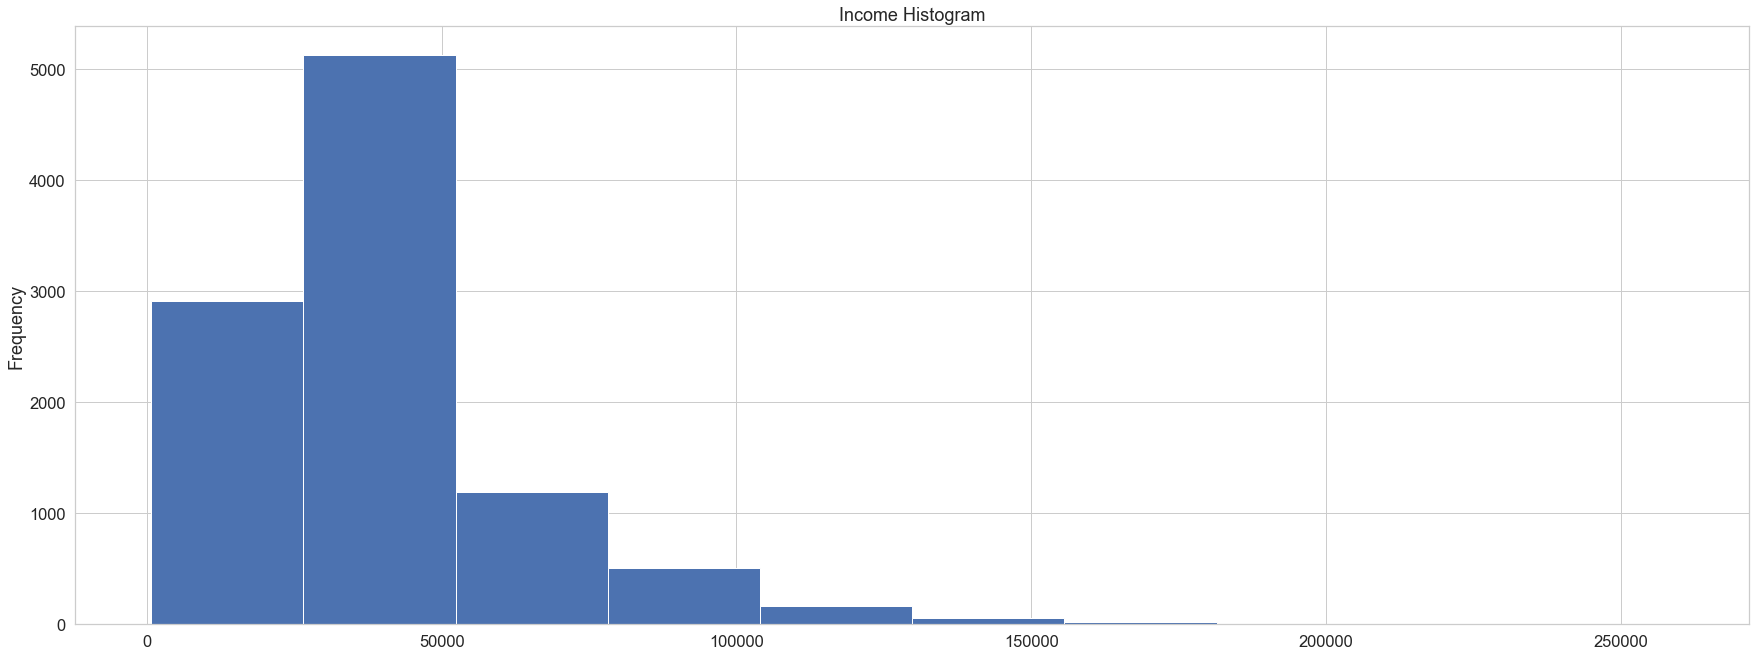

In [53]:
# Investigate distribution of Income column using histogram
df["Income"].plot(kind = "hist", title = 'Income Histogram')

In [54]:
# Create a new column with standarized Income values
df["Income_z"] = stats.zscore(df["Income"])

In [56]:
# Based on the z score isolate the outliers
df_income_outliers = df.query('Income_z > 3 | Income_z < -3')

In [57]:
# Create a new data set for the outliers and sort it in descending order
df_income_outliers_sort_values = df_income_outliers.sort_values(['Income_z'], ascending = False)

In [58]:
# List out the outliers
df_income_outliers_sort_values['Income'].head()

4249    258900.7
9180    256998.4
5801    212255.3
6837    194550.7
3985    189938.4
Name: Income, dtype: float64

##### Investigate Outliers in the Population column

<AxesSubplot:>

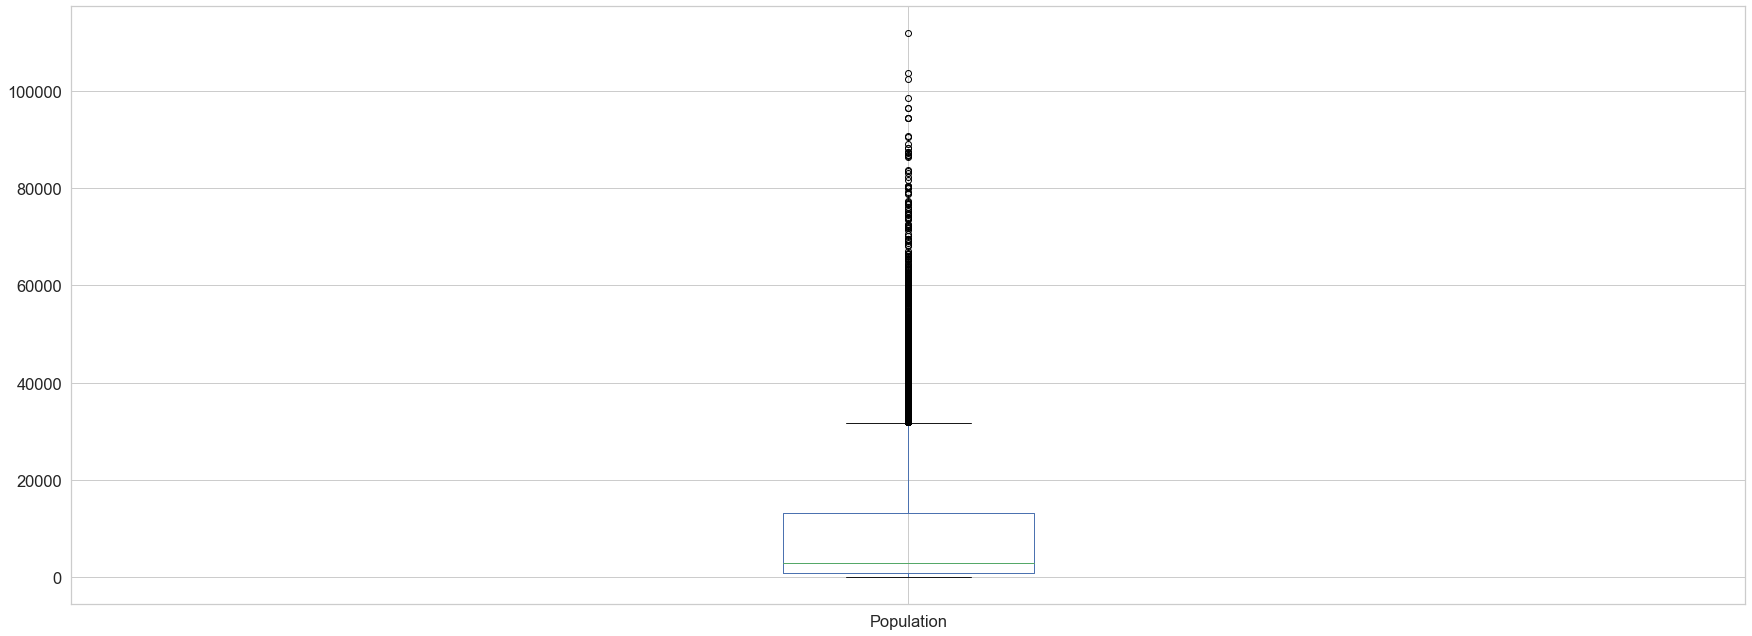

In [59]:
# Using box plot plot to identify outliers
Population = df['Population']
Population.plot.box()

<AxesSubplot:title={'center':'Population Histogram'}, ylabel='Frequency'>

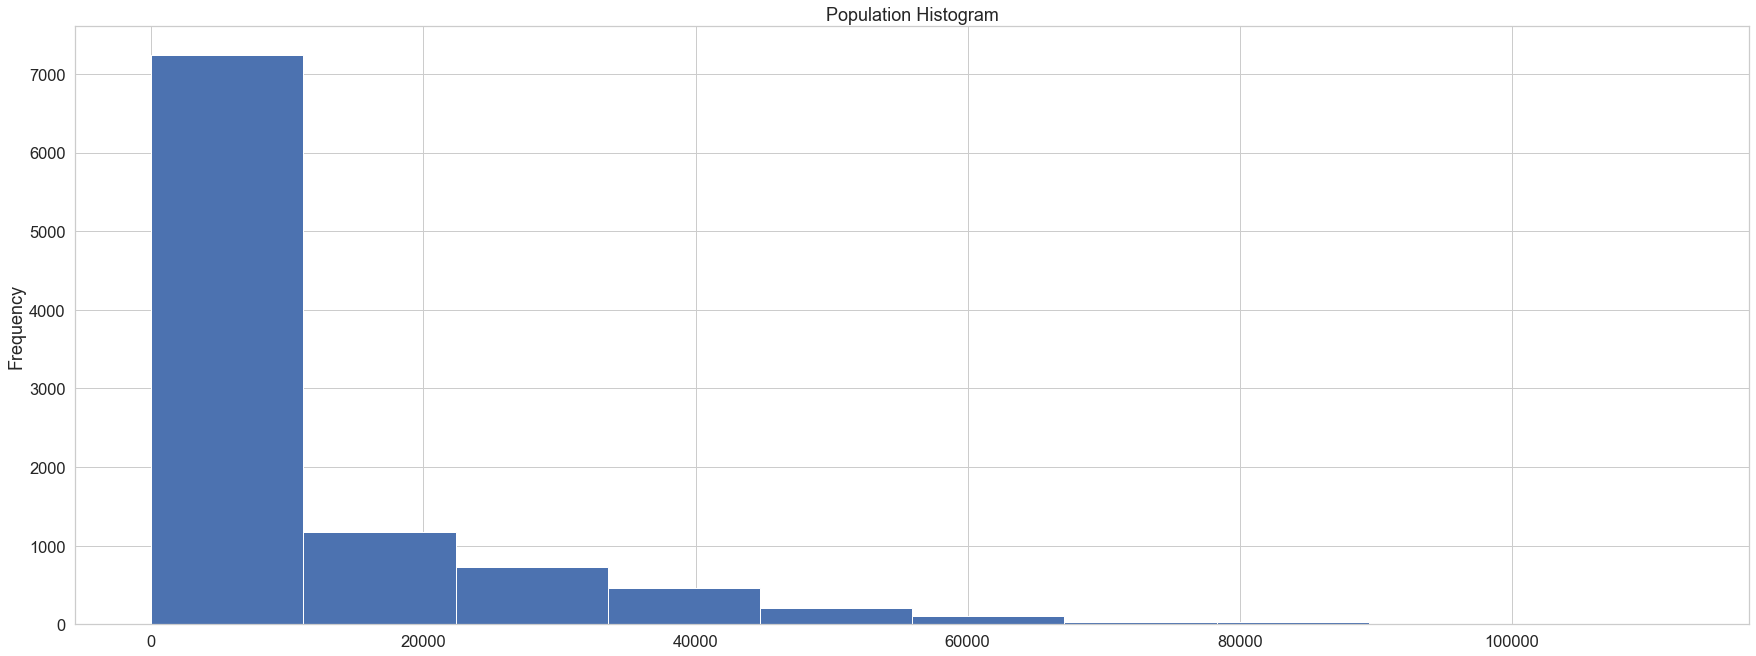

In [60]:
# Investigate distribution of Population column using histogram
df["Population"].plot(kind = "hist", title = 'Population Histogram')

In [61]:
# Create a new column with standarized median values
df["Population_z"] = stats.zscore(df["Population"])

In [62]:
# Based on the z score isolate the outliers
df_Population_outliers = df.query('Population_z > 3 | Population_z < -3')

In [63]:
# Create a new data set for the outliers and sort it in descending order
df_Population_outliers_sort_values = df_Population_outliers.sort_values(['Population_z'], ascending = False)

In [64]:
# List out the outliers
df_Population_outliers_sort_values['Population'].head()

8139    111850
8320    103732
6288    102433
1775     98660
6610     96575
Name: Population, dtype: int64

#### PCA Analysis

In [65]:
# Load data frame
df = pd.read_csv('dataSet/churn_raw_data.csv', index_col=0)

In [66]:
# Quick view of the data-set
df.head()

,CaseOrder,Customer_id,Interaction,City,State,County,Zip,Lat,Lng,Population,Area,Timezone,Job,Children,Age,Education,Employment,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,item1,item2,item3,item4,item5,item6,item7,item8
1,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,38,Urban,America/Sitka,Environmental health practitioner,NaN,68.0,Master's Degree,Part Time,28561.99,Widowed,Male,No,6.972566,10,0,1,No,One year,Yes,Yes,Fiber Optic,Yes,No,Yes,Yes,No,No,No,Yes,Yes,Credit Card (automatic),6.795513,171.449762,904.536110,5,5,5,3,4,4,3,4
2,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,10446,Urban,America/Detroit,"Programmer, multimedia",1.0,27.0,Regular High School Diploma,Retired,21704.77,Married,Female,Yes,12.014541,12,0,1,Yes,Month-to-month,No,Yes,Fiber Optic,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,Bank Transfer(automatic),1.156681,242.948015,800.982766,3,4,3,3,4,3,4,4
3,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,3735,Urban,America/Los_Angeles,Chief Financial Officer,4.0,50.0,Regular High School Diploma,Student,NaN,Widowed,Female,No,10.245616,9,0,1,Yes,Two Year,Yes,No,DSL,Yes,Yes,No,No,No,No,No,Yes,Yes,Credit Card (automatic),15.754144,159.440398,2054.706961,4,4,2,4,4,3,3,3
4,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,Del Mar,CA,San Diego,92014,32.96687,-117.24798,13863,Suburban,America/Los_Angeles,Solicitor,1.0,48.0,Doctorate Degree,Retired,18925.23,Married,Male,No,15.206193,15,2,0,Yes,Two Year,No,No,DSL,Yes,No,Yes,No,No,No,Yes,No,Yes,Mailed Check,17.087227,120.249493,2164.579412,4,4,4,2,5,4,3,3
5,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,Needville,TX,Fort Bend,77461,29.38012,-95.80673,11352,Suburban,America/Chicago,Medical illustrator,0.0,83.0,Master's Degree,Student,40074.19,Separated,Male,Yes,8.960316,16,2,1,No,Month-to-month,Yes,No,Fiber Optic,No,No,No,No,No,Yes,Yes,No,No,Mailed Check,1.670972,150.761216,271.493436,4,4,4,3,4,4,4,5


In [67]:
# Add names to the customer feedback columns
df = df.rename(columns=({ 'item1': 'Timely response', 'item2':'Timely fixes', 'item3':'Timely replacements', 
                         'item4':'Reliability', 'item5':'Options', 'item6':'Respectful response',
                         'item7':'Courteous exchange', 'item8':'Evidence of active listening'}))

In [68]:
# Create PCA analysis data-set with feedback response
customer_data = df[['Timely response', 'Timely fixes', 'Timely replacements', 'Reliability','Options','Respectful response',
                         'Courteous exchange','Evidence of active listening']]

In [69]:
# Normalize the data frame
customer_data_norm = (customer_data-customer_data.mean())/customer_data.std()

In [70]:
# Component extraction
pca= PCA(n_components=customer_data.shape[1])

In [72]:
# PCA fitting
pca.fit(customer_data_norm)

PCA(n_components=8)

In [73]:
# PCA transform and normalization
customer_pca = pd.DataFrame(pca.transform(customer_data_norm))

In [74]:
# Principle Component for the Scree plot
columns = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8']

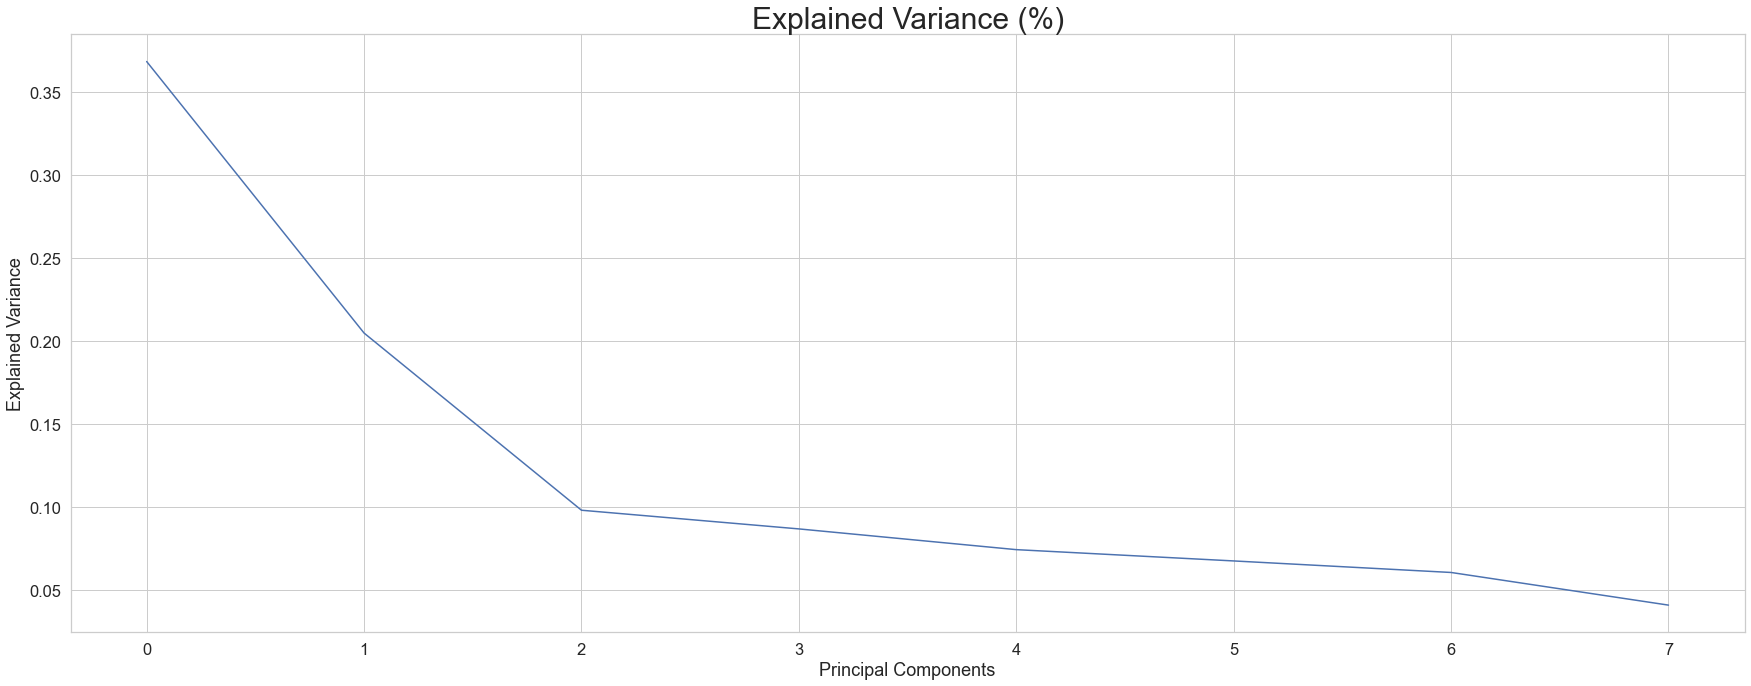

In [75]:
# Scree plot showing the PCs
# Below show the 60 percent of the variance is explained by 2 component 
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance')
plt.title('Explained Variance (%)',  fontsize=30)
plt.show()

In [76]:
# Eigenvalues
cov_matrix = np.dot(customer_data_norm.T, customer_data_norm) / customer_data.shape[0]
EigenV = [np.dot(eigenvector.T, np.dot(cov_matrix, eigenvector)) for eigenvector in pca.components_]

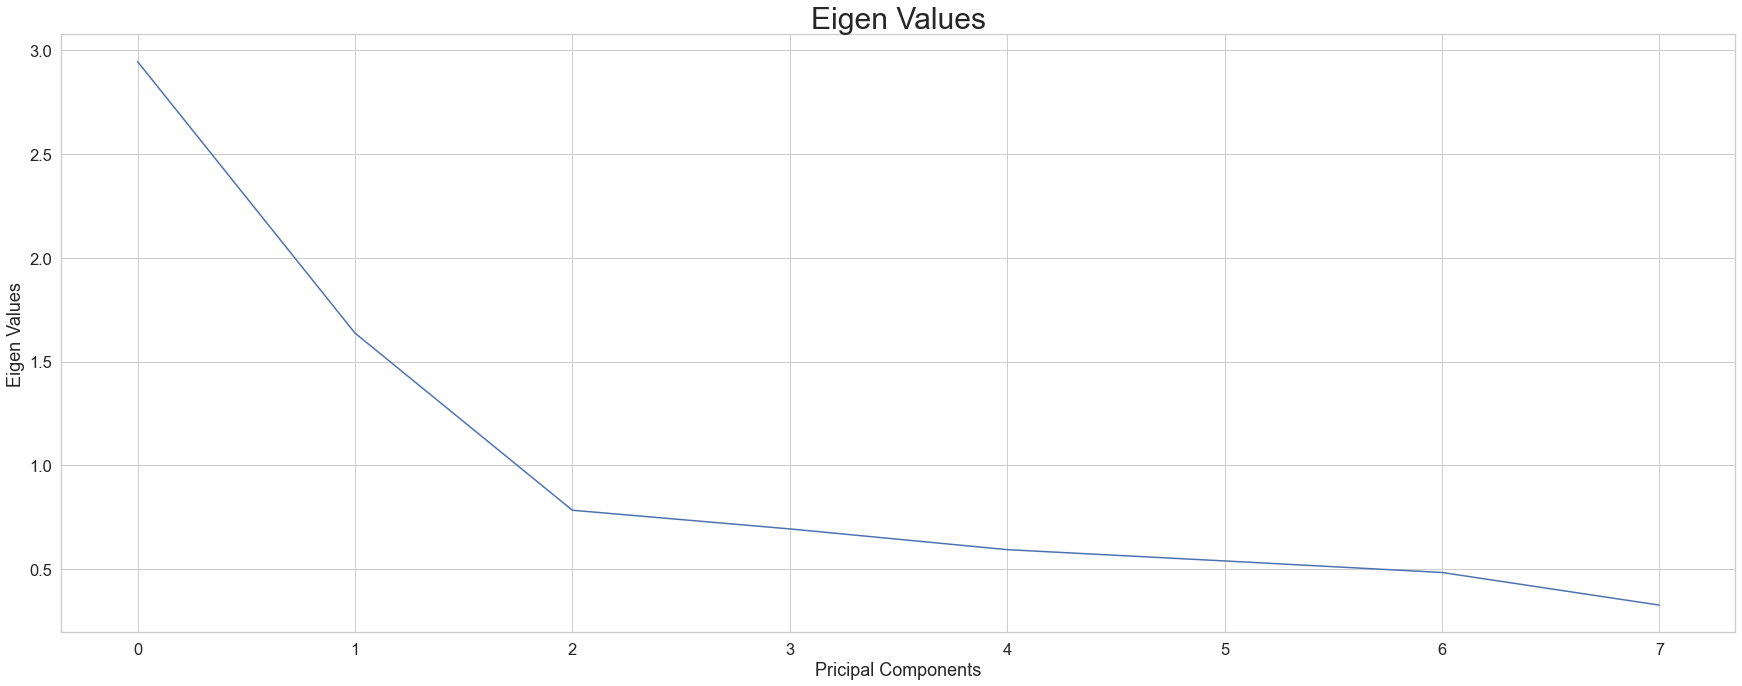

In [77]:
# Scree plot show Eigen Values
# PC0 and PC1 has Eigenvalues greated than 1.
plt.plot(EigenV)
plt.xlabel('Pricipal Components')
plt.ylabel('Eigen Values')
plt.title('Eigen Values',  fontsize=30)
plt.show()

In [78]:
# Loading and identifying the PC from the Customer dataframe
loading = pd.DataFrame(pca.components_.T, columns = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8'], index=customer_data.columns)
loading

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
Timely response,0.459030,0.282717,-0.069221,0.120013,-0.044752,0.025032,-0.241688,0.793174
Timely fixes,0.434342,0.285321,-0.106259,0.170235,-0.064900,0.074672,-0.591586,-0.574375
Timely replacements,0.400775,0.282950,-0.173885,0.254689,-0.148134,-0.396761,0.673403,-0.177149
Reliability,0.145686,-0.569898,-0.171525,0.482754,-0.444692,0.431115,0.086961,0.018610
Options,-0.175385,0.591292,0.135315,-0.060906,-0.211030,0.693537,0.265272,-0.041198
Respectful response,0.405197,-0.183897,-0.061988,-0.063712,0.757170,0.403694,0.231751,-0.064123
Courteous exchange,0.358413,-0.181067,-0.184917,-0.806749,-0.378391,0.067449,0.066043,-0.040309
Evidence of active listening,0.308851,-0.132624,0.931619,0.009229,-0.114326,-0.044789,0.046267,-0.042500


In [79]:
# Isolate and show values of the PC1
load = loading['PC1'] > .4
loading[load]['PC1']

Timely response        0.459030
Timely fixes           0.434342
Timely replacements    0.400775
Respectful response    0.405197
Name: PC1, dtype: float64

### Part III: Data Cleaning

###### D.  Summarize the data-cleaning process by doing the following:
D1. I was able to find 8 columns with anomalies. Children, Phone, Techie and TechSupport were categorical, and their ‘null’ values were replaced with ‘No’. I used the 'Reexpression of Categorial column' to create the Education column. The limitations are as follow:

D2. Categorical data imputation limitation can distort the data if the assumptions are not confirmed.
* Children: The customer might have chosen not to tell the actual number of children they have due to privacy concerns.
* Phone: Customer might have chosen not to list their phone number due to privacy concerns.
* Techie: This could have been left out as a human error.
* TechSupport: This could a human error, someone might not have entered appropriate values assuming 'No' and '' are the same.

D2a. Numerical data
The continuous type columns (Age, Income, Tenure, Bandwidth_GB_Year) data were replaced using python’s median functions because these are continuous and the data was either skewed to left or Bimodal. I chose this because it is simple, easy to apply method and does not reduce the sample size. on the limitation side, it is possible to distort data / distribution of the data. The rest of the columns were not part of the process as they did not have any null values.

D3. All the missing categorical values were imputed to ‘No’ and numerical values were imputed using median central tendency. Age and Tenure were left alone as they did not have any outliers.

D4. Code is available above and in the Panopto recording

D5. Attached file ‘Cleaned_Data_set.csv’) 

D6 & D7. The data cleaning process assumes that replacing categorical null values with ‘No’ is the right approach however this can lead to inflated data that will lean toward replaced values and can lead to inaccurate decision making. Similarly, using statical central tendencies is an appropriate approach but can lead to inflated data and imbalanced decision making. Imputing data values using the above steps can give us a picture but cannot replace true values which were missed due to human error/system errors.

###### E.  Apply principal component analysis (PCA) to identify the significant features of the data set by doing the following:
1.  List the principal components in the data set.
* Timely response
* Timely fixes
* Timely replacements
* Respectful response
2.  Describe how you identified the principal components of the data set.
* PC0 and PC1 should be kept as they have Eigenvalues greater than 1.
3.  Describe how the organization can benefit from the results of the PCA
* The four identified scores should be reviewed carefully to understand customer's feedback. This will help the company to keep their customer for a longer time hence increasing profits.
 

### Part IV. Supporting Documents

###### F.  Provide a Panopto recording that demonstrates the warning- and error-free functionality of the code used to support the discovery of anomalies and the data cleaning process and summarizes the programming environment.
 
Note: For instructions on how to access and use Panopto, use the "Panopto How-To Videos" web link provided below. To access Panopto's website, navigate to the web link titled "Panopto Access", and then choose to log in using the “WGU” option. If prompted, log in using your WGU student portal credentials, and then it will forward you to Panopto’s website.
 
To submit your recording, upload it to the Panopto drop box titled “Data Cleaning – NUM2 \ D206” Once the recording has been uploaded and processed in Panopto's system, retrieve the URL of the recording from Panopto and copy and paste it into the Links option. Upload the remaining task requirements using the Attachments option.

###### G.  Reference the web sources used to acquire segments of third-party code to support the application. Be sure the web sources are reliable.

```{bibliography}
Pandas. (2021). Pandas DataFrames. https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dtypes.html

Get started with references. (2021). Jupyterbook. https://jupyterbook.org/tutorials/references.html#tutorials-references

Marques, A. M. (2020, March 11). How to show all columns / rows of a Pandas Dataframe? Towards Data Science. https://towardsdatascience.com/how-to-show-all-columns-rows-of-a-pandas-dataframe-c49d4507fcf
```

###### H.  Acknowledge sources, using in-text citations and references, for content that is quoted, paraphrased, or summarized.
```{bibliography}
Chantal D. Larose, & Daniel T. Larose. (2019). Data Science Using Python and R. Wiley.


```